In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import math as m
import os
import pandas as pd
import scipy.interpolate as sp
from itertools import groupby

In [2]:
train_data = os.listdir("/Users/bhagyasubrayan/Desktop/ZTF/ztf2019lc")
#print(train_data)
train_data.sort()
train_data.remove('.DS_Store')
for j in range(len(train_data)):
    train_data[j] = train_data[j].replace(('.'+'_'),'')
train_data.remove(train_data[-1])
train_data.remove(train_data[-1])
#train_data[-1]

In [3]:
def order(x):
    ord = [list(i) for j, i in groupby(x, lambda a: a.split('.')[0])]
    return ord
def parse_my_file(filename):
    with open(filename) as f:
        lines = f.readlines()[1:]
        for line in lines:
            yield line.strip().split(' ', 3)
        f.close()
def extract(filename):
    with open(filename) as file:
        file_line = file.readline()
        a = file_line.strip().split(' ',2)
        return a[2]
def file_process(filename):
    df_j = pd.DataFrame(parse_my_file(filename),columns = ['mjd','filter','flux','flux_err'])
    df_j = df_j.sort_values(by = ['mjd']).reset_index(drop = 'True')
    df_j = df_j.apply(pd.to_numeric)
    return df_j
def plot(y):
    plt.title('LC_'+y)
    plt.plot(df_j['mjd'],df_j['flux'],'o')
    plt.errorbar(df_j['mjd'],df_j['flux'],yerr = df_j['flux_err'],fmt='o')
def name(p):
    f_name = "/Users/bhagyasubrayan/Desktop/ZTF/ztf2019lc/" + p
    return f_name

In [4]:
f_g = order(train_data)
f_g[-1]

['ZTF19acszmgx.g.txt', 'ZTF19acszmgx.r.txt']

In [35]:
no_data = []
type2 =[]
sparse_data = []
overcad = []
type_maj = []
for i in range(0,len(f_g)):
    for j in range(0,2):
        #print(f_g[i][j])
        f_name = name(f_g[i][j])
        if(extract(f_name)=='II'):
            type_maj.append(f_g[i][j])
            df_j = file_process(f_name)
        #divide_to_group(f_name)
        #print((df_j))
            if(df_j.empty == True):
                no_data.append(f_g[i][j])
                #print('Encountered a no_data file:', f_g[i][j])
            elif(len(df_j) <= 3):
                sparse_data.append(f_g[i][j])
            elif((df_j['mjd'].max() - df_j['mjd'].min()) >= 200):
                overcad.append(f_g[i][j])
                #print(f_g[i][j])
                #print(df_j)
            else:
                type2.append(f_g[i][j])
        #print(df_j.iloc[0]['filter'])
        #print(no_data)
            #plot(f_g[i][j])
    #if(extract(f_name) == 'II'):
        #plt.gca().invert_yaxis()
        #plt.show()
    else:
        continue

In [38]:

sparse_data = [sparse_data[i].split('.')[0] for i in range(len(sparse_data))]
sparse_data = np.unique(np.array(sparse_data))
for i in range(len(sparse_data)):
    print('https://alerce.online/object/'+ sparse_data[i] )

https://alerce.online/object/ZTF18aahmrtf
https://alerce.online/object/ZTF18aatjlhe
https://alerce.online/object/ZTF18abwcooy
https://alerce.online/object/ZTF18abyvenk
https://alerce.online/object/ZTF18abzscns
https://alerce.online/object/ZTF18acbwtng
https://alerce.online/object/ZTF18accfjmp
https://alerce.online/object/ZTF18acnbptb
https://alerce.online/object/ZTF18acqppuj
https://alerce.online/object/ZTF18acrygtk
https://alerce.online/object/ZTF18acwzxhr
https://alerce.online/object/ZTF18acxwsvb
https://alerce.online/object/ZTF18adacicy
https://alerce.online/object/ZTF19aakkwpi
https://alerce.online/object/ZTF19aasmddt
https://alerce.online/object/ZTF19aatmgjs
https://alerce.online/object/ZTF19aaxkhxw
https://alerce.online/object/ZTF19abmtpvz
https://alerce.online/object/ZTF19abtuflm
https://alerce.online/object/ZTF19acaqqke
https://alerce.online/object/ZTF19acbihxh
https://alerce.online/object/ZTF19acduloz
https://alerce.online/object/ZTF19acgjpgh
https://alerce.online/object/ZTF19

In [6]:
print(len(type_maj)) #unfiltered
print(len(type2))# After removing no data and sparse data and ovvercad

278
220


In [6]:
type2_max = [] # Checking if there is max in the first two data points
for i in range(0,len(type2)):
    df = file_process(name(type2[i]))
    #print(df)
    tag = df['flux'].min()
    id = np.where(df['flux'] == tag)
    #print(tag)
    #print(id[0][0])
    #print
    if (id[0][0] > 1):
        type2_max.append(type2[i])
    else:
        continue

In [8]:
print(len(type2))
print(len(type2_max))# After removing ones without rise

220
130


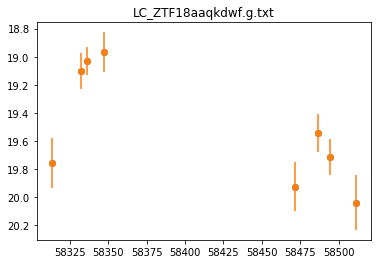

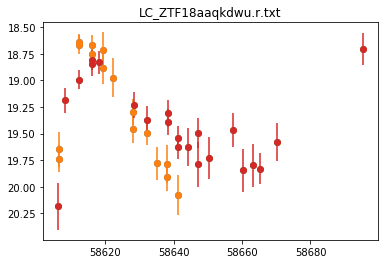

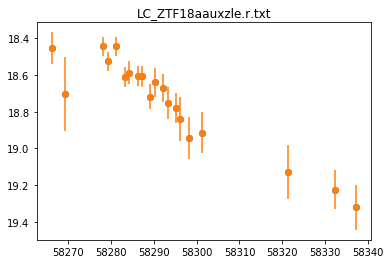

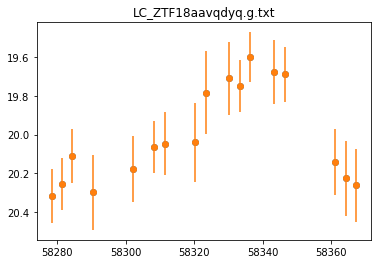

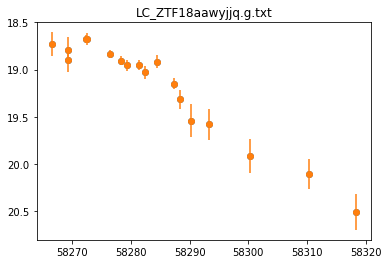

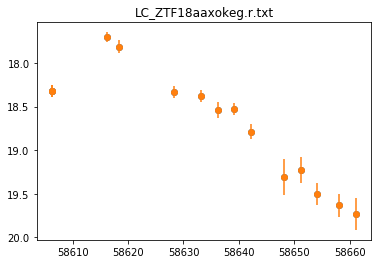

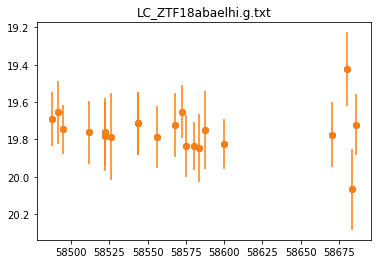

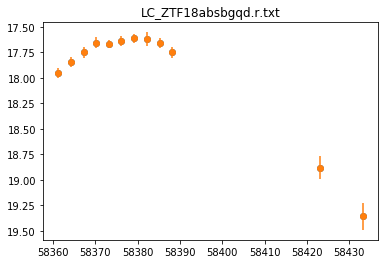

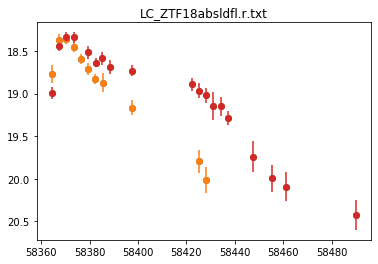

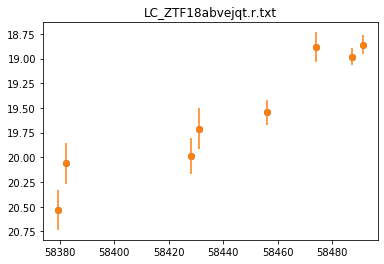

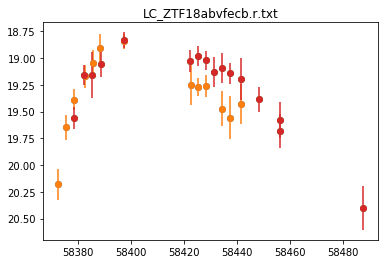

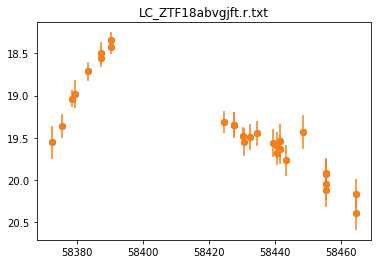

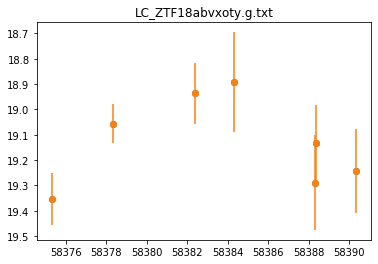

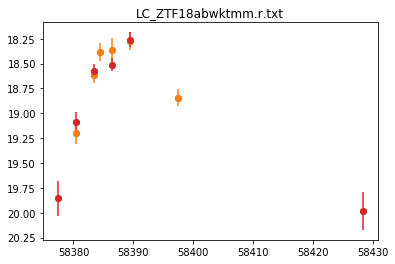

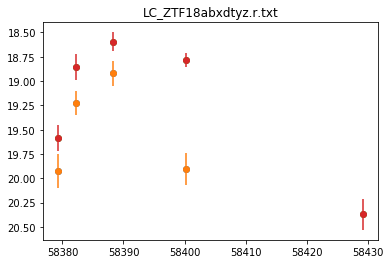

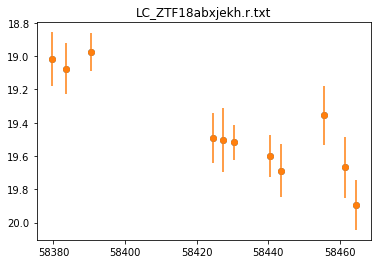

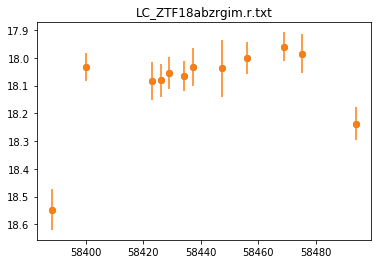

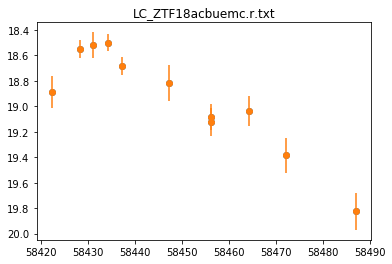

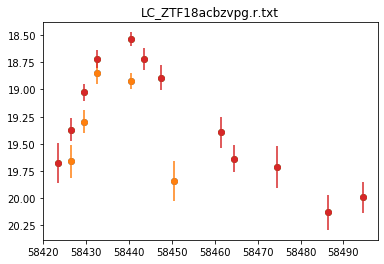

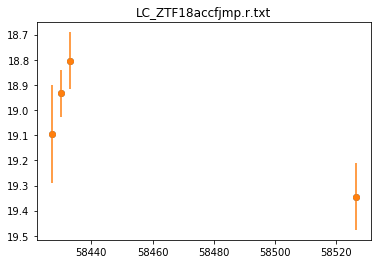

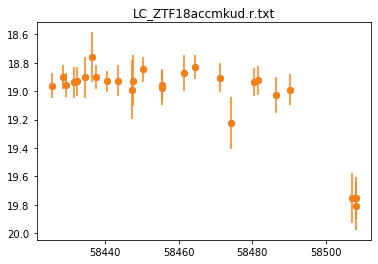

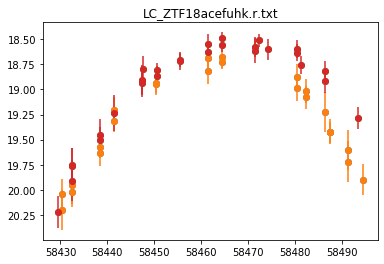

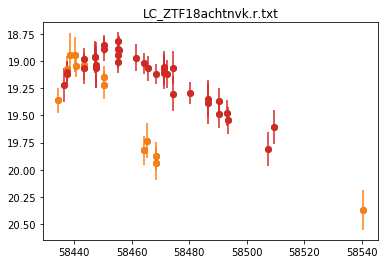

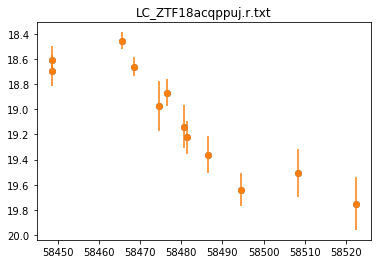

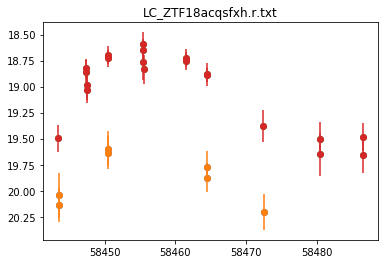

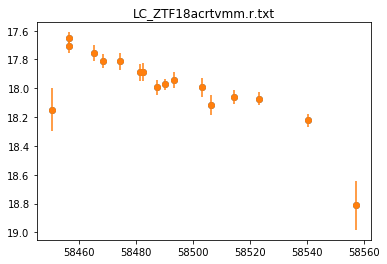

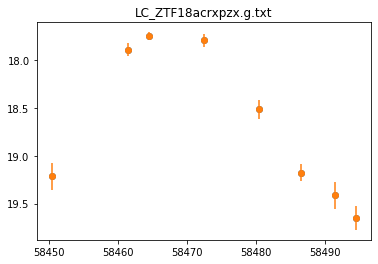

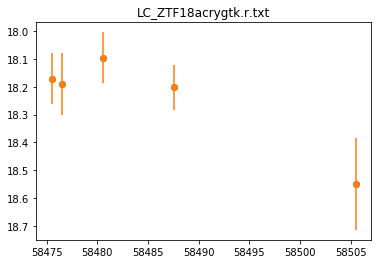

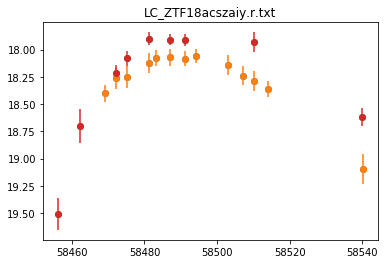

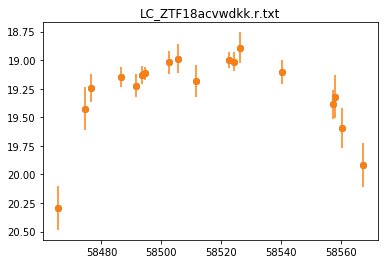

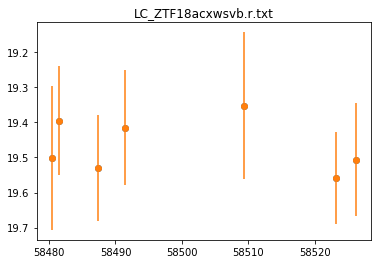

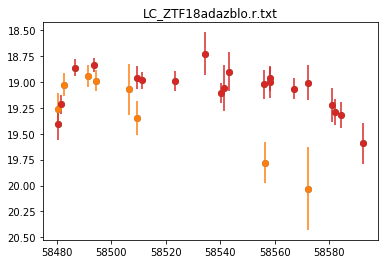

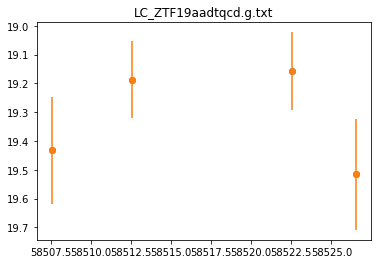

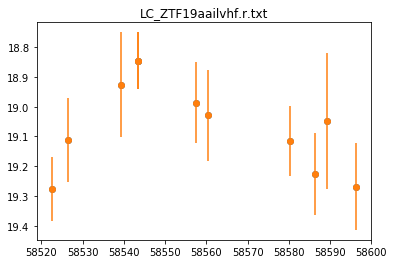

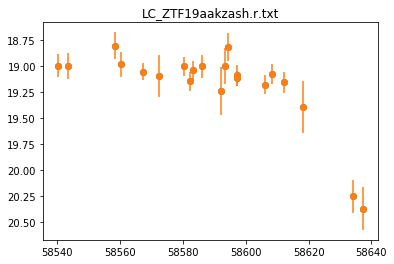

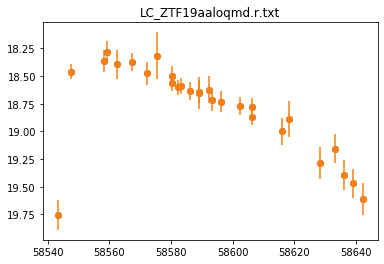

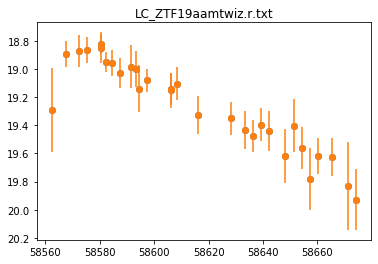

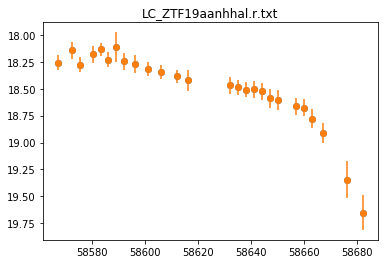

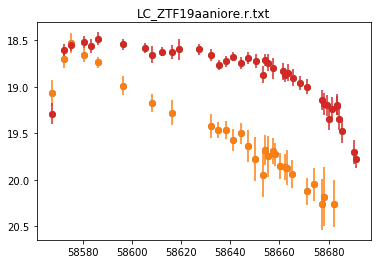

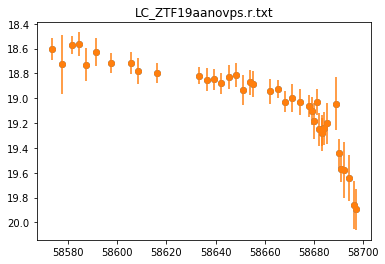

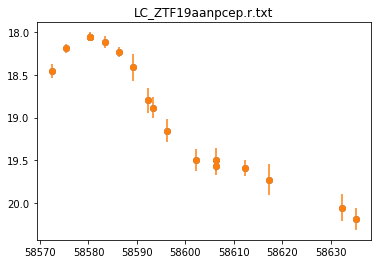

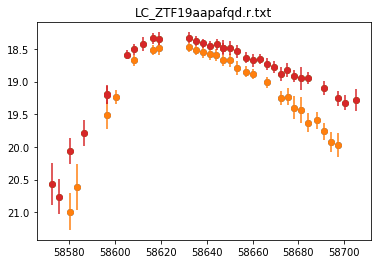

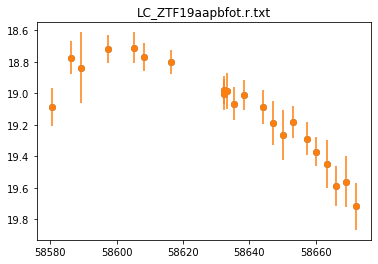

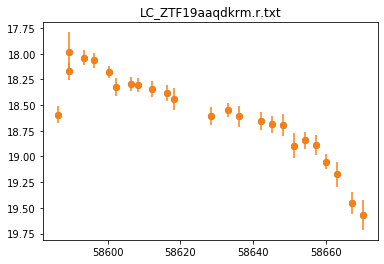

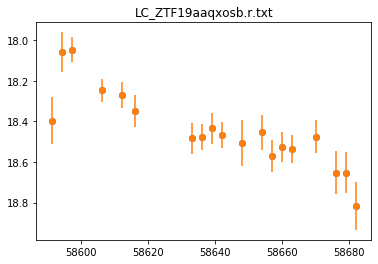

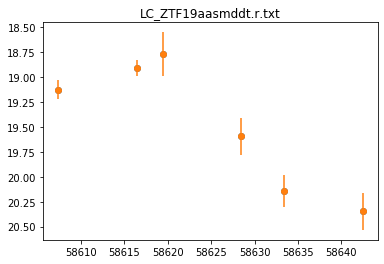

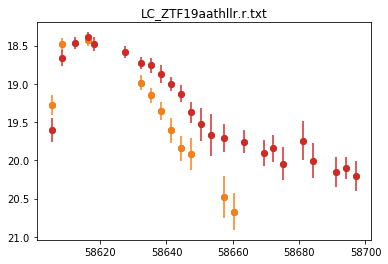

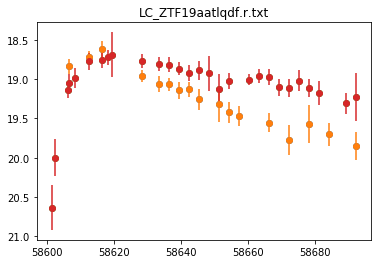

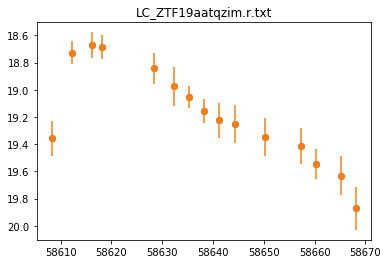

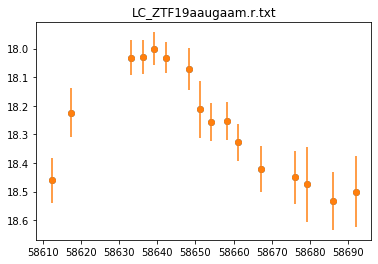

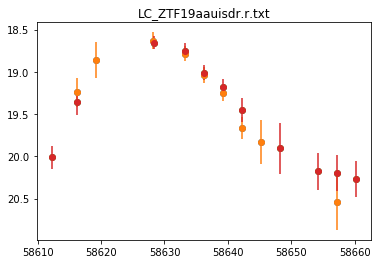

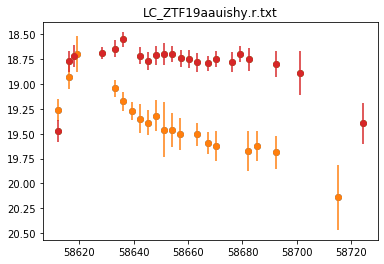

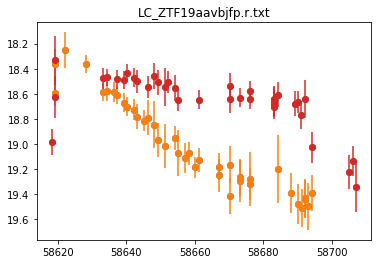

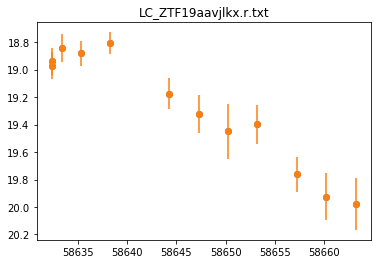

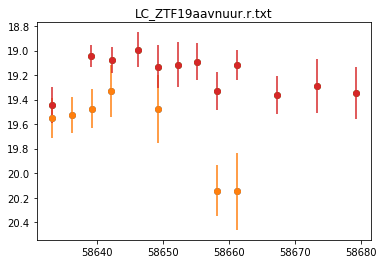

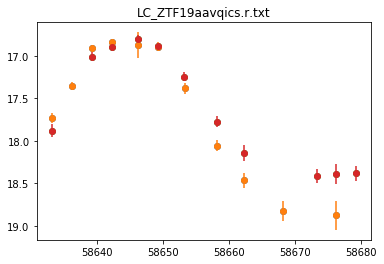

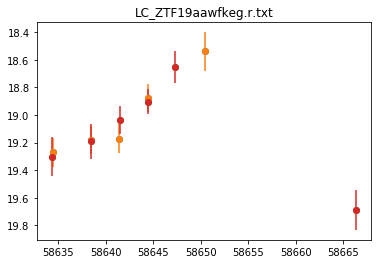

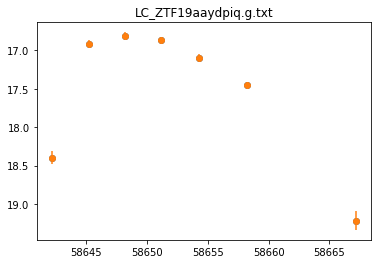

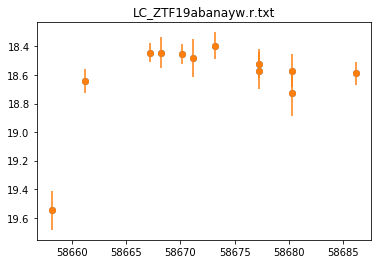

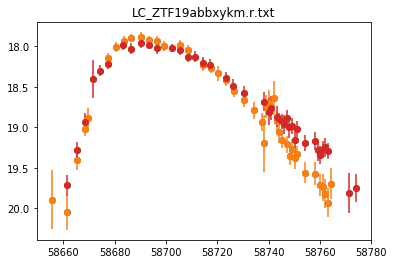

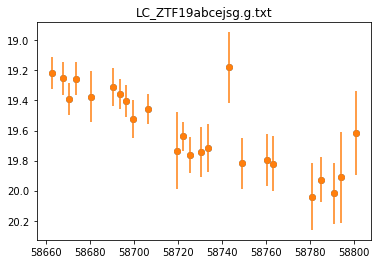

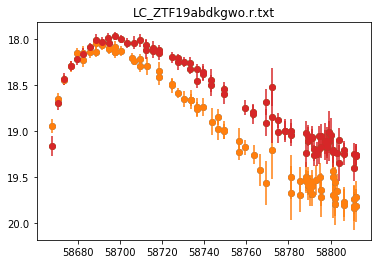

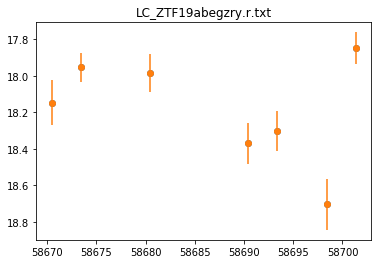

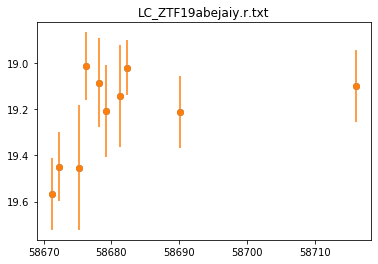

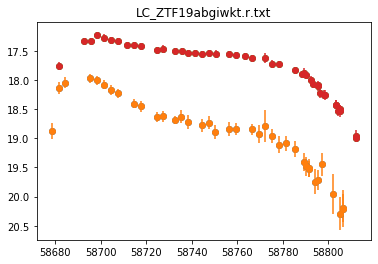

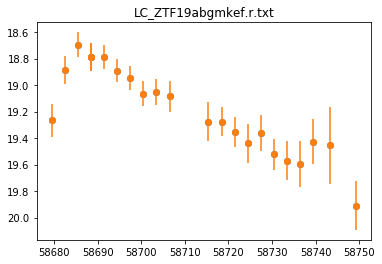

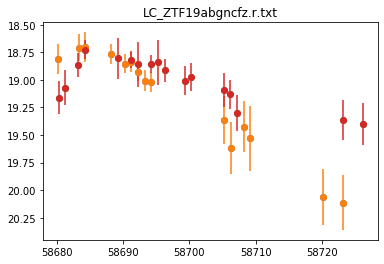

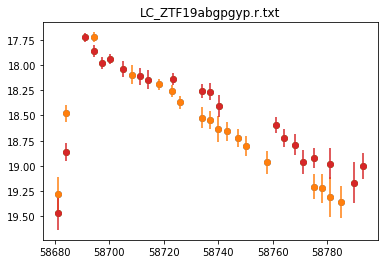

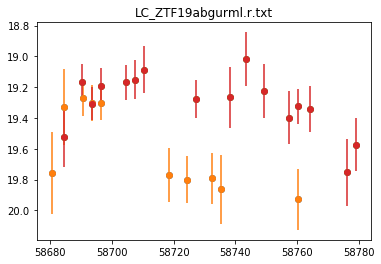

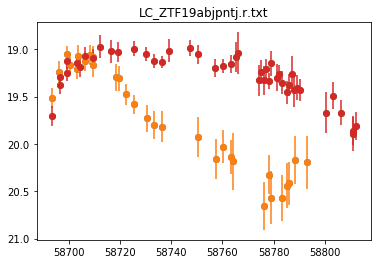

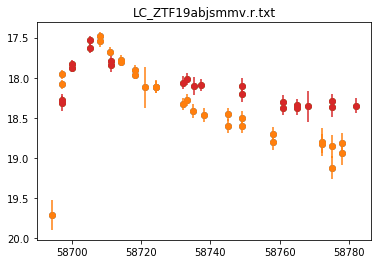

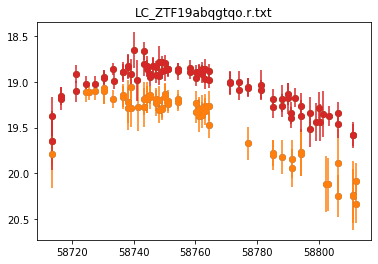

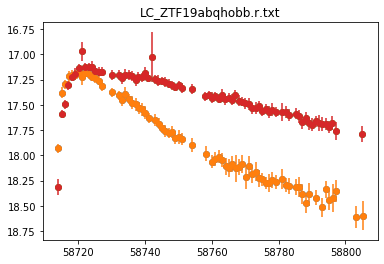

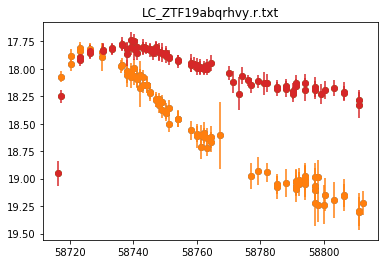

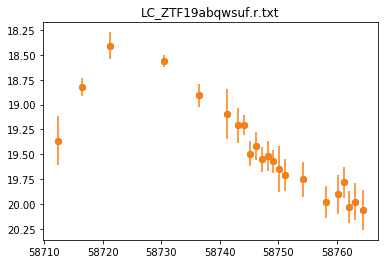

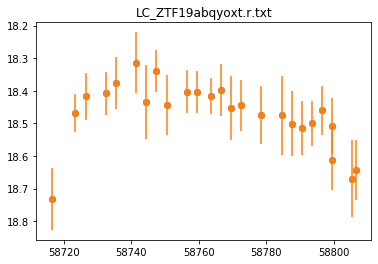

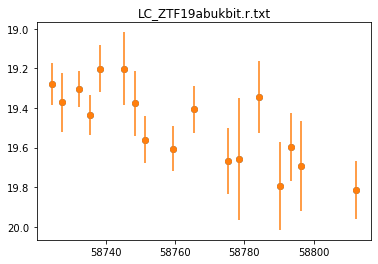

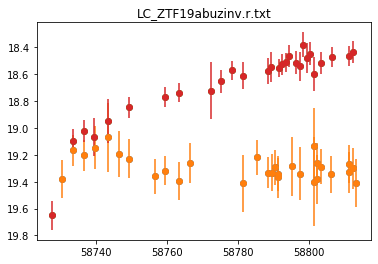

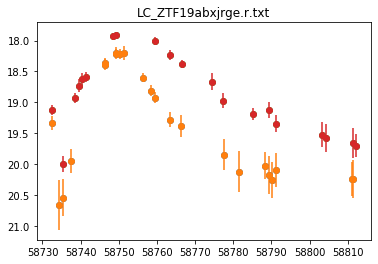

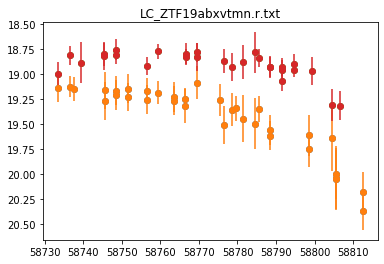

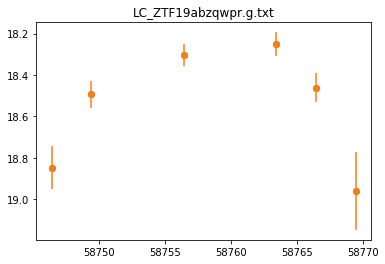

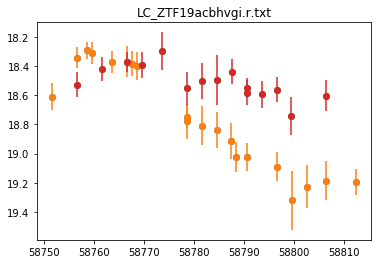

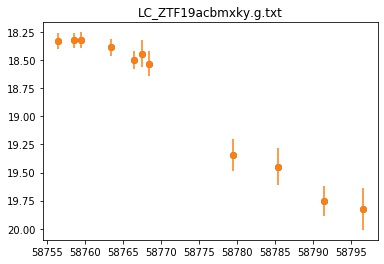

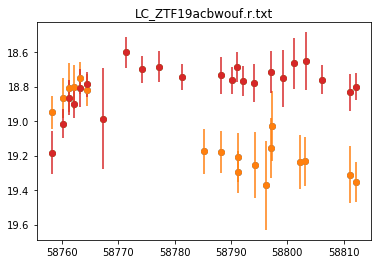

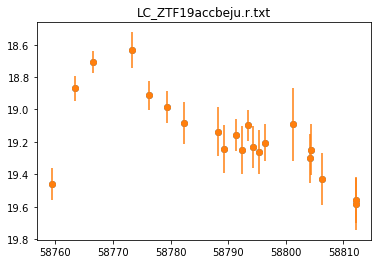

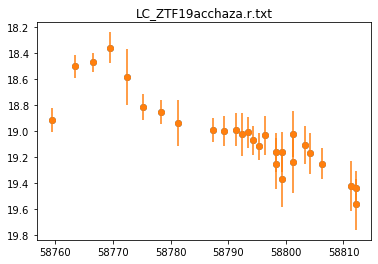

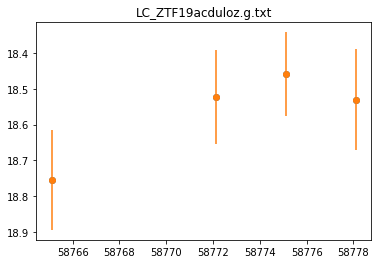

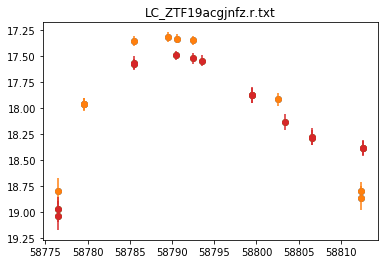

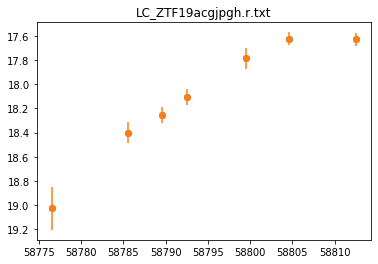

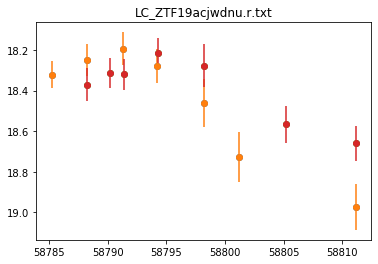

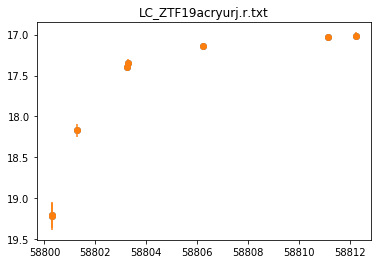

In [9]:
h = order(type2_max)
#len(h)
for i in range(len(h)):
    if(len(h[i])== 1):
        df_j = file_process(name(h[i][0]))
        plot(h[i][0])
    else:
        for j in range(0,2):
            df_j = file_process(name(h[i][j]))
            plot(h[i][j])
    plt.gca().invert_yaxis()
    plt.show()            

In [ ]:
type(name(type2[0]))

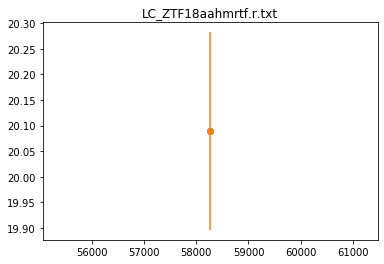

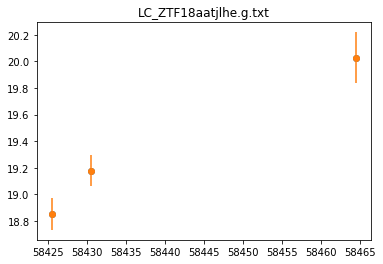

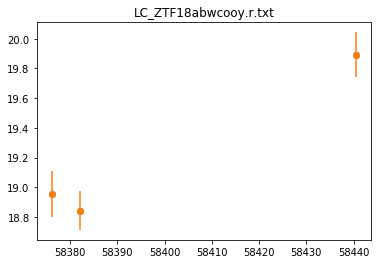

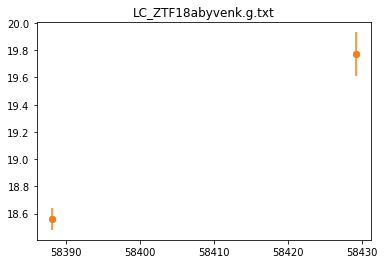

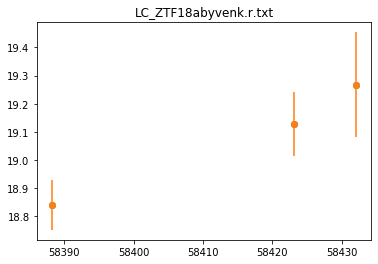

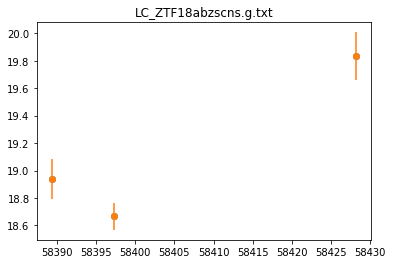

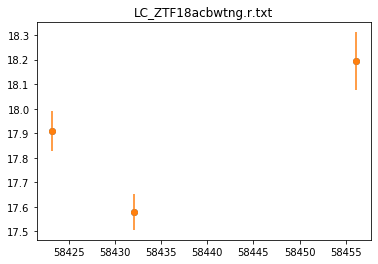

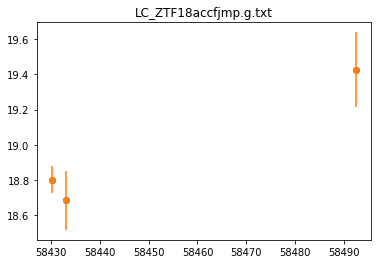

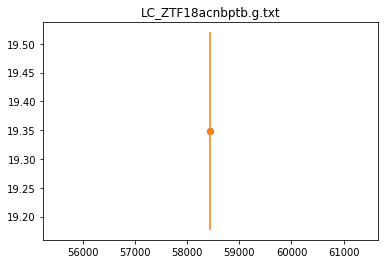

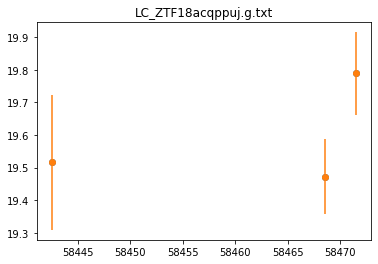

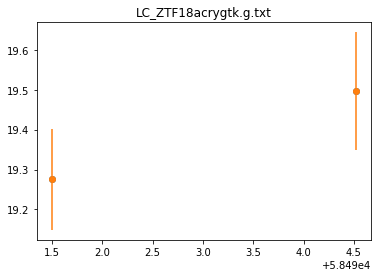

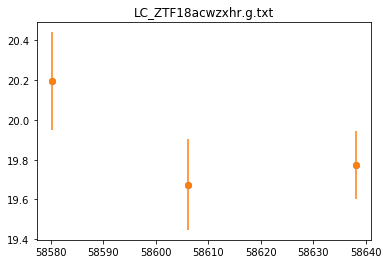

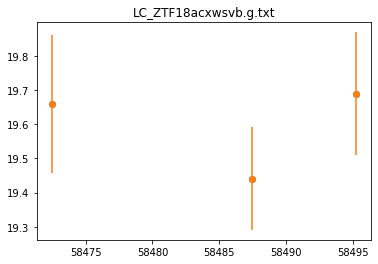

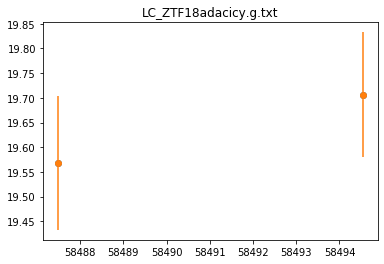

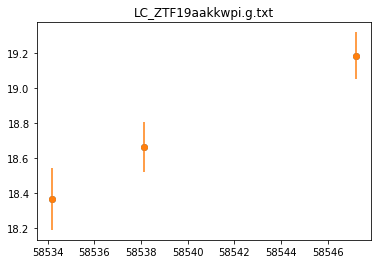

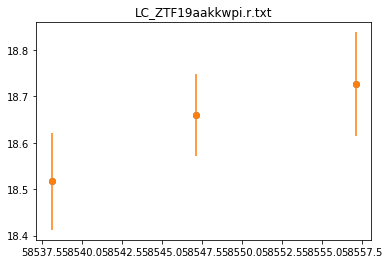

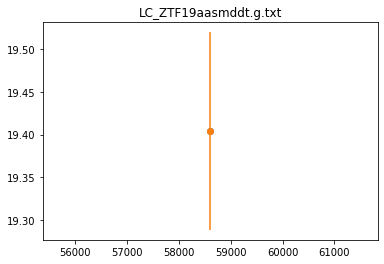

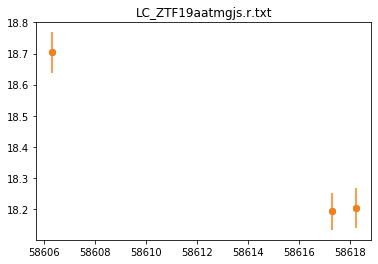

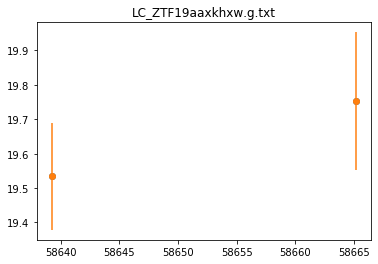

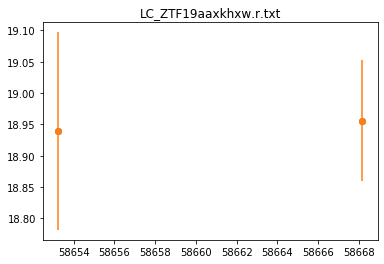

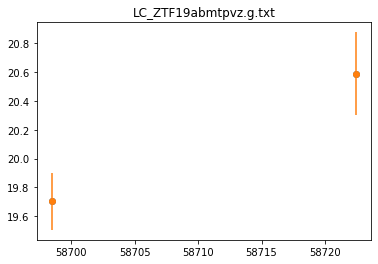

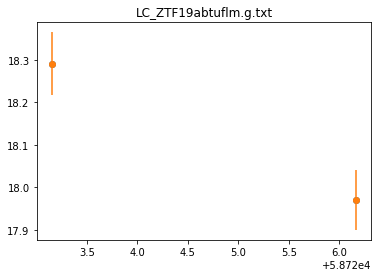

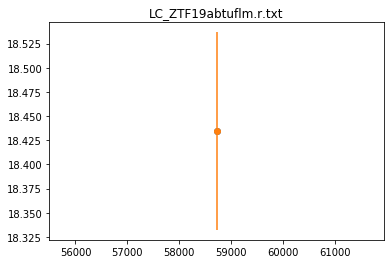

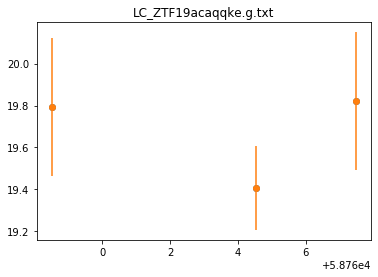

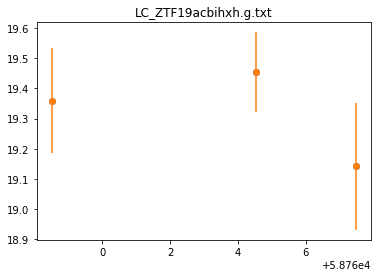

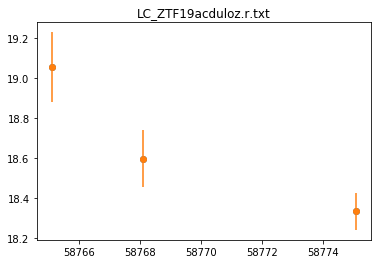

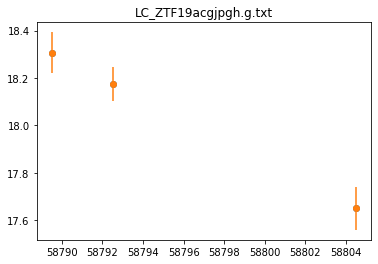

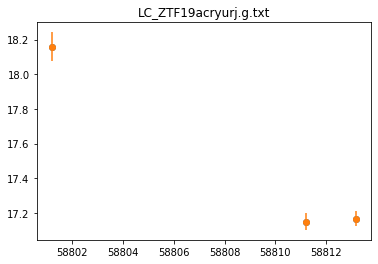

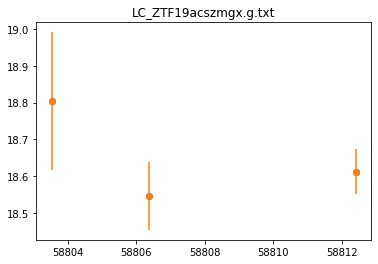

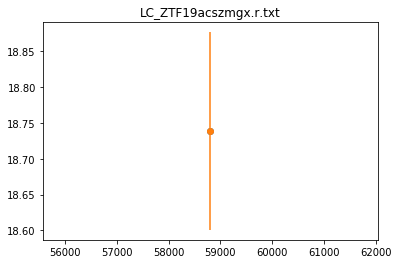

In [15]:
for i in range(len(sparse_data)):
    df_j = file_process(name(sparse_data[i]))
    plot(sparse_data[i])
    plt.show()

In [43]:

for i in range(len(sparse_data)):
    print('https://alerce.online/object/'+ sparse_data[i].split('.')[0] )

https://alerce.online/object/ZTF18aahmrtfrtxt
https://alerce.online/object/ZTF18aatjlhegtxt
https://alerce.online/object/ZTF18abwcooyrtxt
https://alerce.online/object/ZTF18abyvenkgtxt
https://alerce.online/object/ZTF18abyvenkrtxt
https://alerce.online/object/ZTF18abzscnsgtxt
https://alerce.online/object/ZTF18acbwtngrtxt
https://alerce.online/object/ZTF18accfjmpgtxt
https://alerce.online/object/ZTF18acnbptbgtxt
https://alerce.online/object/ZTF18acqppujgtxt
https://alerce.online/object/ZTF18acrygtkgtxt
https://alerce.online/object/ZTF18acwzxhrgtxt
https://alerce.online/object/ZTF18acxwsvbgtxt
https://alerce.online/object/ZTF18adacicygtxt
https://alerce.online/object/ZTF19aakkwpigtxt
https://alerce.online/object/ZTF19aakkwpirtxt
https://alerce.online/object/ZTF19aasmddtgtxt
https://alerce.online/object/ZTF19aatmgjsrtxt
https://alerce.online/object/ZTF19aaxkhxwgtxt
https://alerce.online/object/ZTF19aaxkhxwrtxt
https://alerce.online/object/ZTF19abmtpvzgtxt
https://alerce.online/object/ZTF19

['ZTF18aahmrtfrtxt']